In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits,load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
mnist = pd.read_csv('mnist-in-csv/mnist_test.csv')
# for test in testing_set:
#     if sklearn_knn.predict(test) == your_knn(test, features, labels, k = 1):
#         print "Error in " + str(test)

In [3]:
mnist_data = np.array(mnist[mnist.columns[1:]])

In [4]:
mnist_labels = np.array(mnist[mnist.columns[0]])
mnist_data.shape

(10000, 784)

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(mnist_data[:3000], mnist_labels[:3000], test_size=0.1,
#                                                    random_state=11)
def split_data(x,y,test_size):
    size=len(x)
    train_idx_start = 0
    train_idx_stop = int(size*(1-test_size))
    test_idx_start = train_idx_stop
    test_idx_stop = train_idx_stop + int(size*test_size)
    x_train = np.array(x[0:train_idx_stop])
    x_test = np.array(y[0:train_idx_stop])
    y_train = np.array(x[test_idx_start:test_idx_stop])
    y_test =  np.array(y[test_idx_start:test_idx_stop])
    return x_train, x_test, y_train, y_test
    
X_train, y_train, X_test, y_test = split_data(mnist_data[:3000],mnist_labels[:3000],test_size=0.1)
    

In [7]:
X_train = X_train/255
X_test = X_test/255
sklearn_knn = KNeighborsClassifier(n_neighbors=2)
sklearn_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [8]:
X_test.shape

(300, 784)

In [17]:
def show_mnist_image(arr):
    plt.imshow(arr.reshape((28,28)))

In [9]:
sklearn_knn.predict(X_test[65].reshape(1,-1))

array([0])

In [10]:
accuracy_score(y_true=y_test, y_pred=sklearn_knn.predict(X_test))

0.92

In [11]:
!pip install NearPy

In [12]:
from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections

In [13]:
# Dimension of our vector space
dimension = 784

# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)

# Create engine with pipeline configuration
engine = Engine(dimension, lshashes=[rbp])

# Index 1000000 random vectors (set their data to a unique string)
for img_vec in X_train:
    engine.store_vector(img_vec, 'data_%d' % index)

# Create random query vector



NameError: name 'index' is not defined

In [18]:
def check_accuracy(x_test, y_test,X_train,y_train):
    acc = 0
    for x,y in zip(x_test,y_test):
        N = engine.neighbours(x)
        print(len(N))

time taken for query 0.0007243156433105469


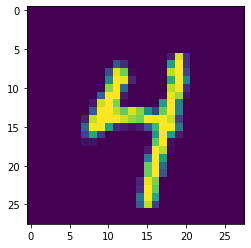

In [19]:
query = X_test[1]
# Get nearest neighbours
t1 = time.time()
N = engine.neighbours(query)
# check_accuracy(X_test, y_test,X_train,y_train)
print('time taken for query', time.time()-t1)
show_mnist_image(query)

In [16]:
show_mnist_image(N[0][0])

NameError: name 'show_mnist_image' is not defined

In [153]:
class LSH:
    def __init__(self,num_rand_vec,data_dim):
        self.num_rand_vec = num_rand_vec
        self.dim = data_dim
        self.hash_table = {}
    
    def gen_random_vectors(self):
        rand_vec_matrix = np.random.randn(self.num_rand_vec,self.dim)
        return rand_vec_matrix
    
    def make_hash_key(self,inp):
        return ''.join(inp)
    
    def fit(self,data):
        assert data.shape[1] == self.dim, 'dimension of input data and dimension in LSH object does not match'
        rand_vecs = self.gen_random_vectors()
        bools = (np.dot(data, rand_vecs.T) > 0).astype('int')
        keys = list(map(self.make_hash_key , (np.dot(data, rand_vecs.T) > 0).astype('int').astype('str')))
        unique_keys = set(keys)
        for key in unique_keys:
            self.hash_table[key] = []
        for idx,k in enumerate(keys):
            self.hash_table[k].append(idx)
        return 'success'
    
    def hash_table(self):
        return self.hash_table
        
    def hash_table_dist(self):
        summary_hash_table = {}
        for k,v in self.hash_table.items():
            summary_hash_table[k] = len(v)
        return summary_hash_table   
    

In [169]:
lsh = LSH(num_rand_vec=4,data_dim=64)

In [206]:
lsh.fit(X_train)

'success'

In [720]:
lsh.hash_table_dist()

NameError: name 'lsh' is not defined

In [165]:
lsh.hash_table['00'].

SyntaxError: invalid syntax (<ipython-input-165-a60e19a887c0>, line 1)

In [425]:
### incorporating multiple tables
class LSH_:
    def __init__(self,hash_size,data_dim,num_tables):
        self.num_rand_vec = hash_size  # number of buckets will be 2**hash_size eg: 2**2=4 (00,01,10,11)
        self.dim = data_dim
        self.num_tables = num_tables
        self.hash_tables = [{} for _ in range(self.num_tables)]
        self.seeds = [i for i in range(self.num_tables)]
        self.random_vectors = []
        for seed in self.seeds:
            np.random.seed(seed)
            self.random_vectors.append(self.gen_random_vectors())
    
    def gen_random_vectors(self):
        rand_vec_matrix = np.random.randn(self.num_rand_vec,self.dim)
        return rand_vec_matrix
    
    
    def make_hash_key(self,inp):
        return ''.join(inp)
    
    def fit(self,data):
        assert data.shape[1] == self.dim, 'dimension of input data is {} and dimension in LSH object is {}'.format(data.shape,self.dim)
        for rand_vec,hash_table in zip(self.random_vectors,self.hash_tables): #, seed in zip(self.hash_tables,self.seeds):
#             np.random.seed(seed)
#             rand_vecs = self.gen_random_vectors()
#             bools = (np.dot(data, rand_vec.T) > 0).astype('int')
            keys = list(map(self.make_hash_key , (np.dot(data, rand_vec.T) > 0).astype('int').astype('str')))
            unique_keys = set(keys)
            for key in unique_keys:
                hash_table[key] = []
            for idx,k in enumerate(keys):
                hash_table[k].append(idx)
        return 'success'
    
    def hash_table(self):
        return self.hash_tables
        
    def hash_table_dist(self):
        distribuitions = []
        for hash_table in self.hash_tables:
            summary_of_table = {}
            for k,v in hash_table.items():
                summary_of_table[k] = len(v)
            distribuitions.append(summary_of_table)
        return distribuitions   
    
    def query(self,query_data):
        key_for_each_table = []
        for rand_vec in self.random_vectors:
            key = ''.join((np.dot(query_data, rand_vec.T) > 0).astype('int').astype('str'))
            key_for_each_table.append(key) #each point will be assigned to exactly on bucket in one hash table
        result = []
        assert len(key_for_each_table) == len(self.hash_tables), 'somethings wrong'
        for hash_table,key in zip(self.hash_tables,key_for_each_table):
            if key in hash_table.keys():
                result.extend(hash_table[key])
#         print(keys_for_each_table)
        return set(result)
            

In [431]:
lsh_= LSH_(hash_size=6,data_dim=784,num_tables=20)

In [432]:
lsh_.fit(X_train)

'success'

In [433]:
# lsh_.hash_table_dist()

In [434]:
query = X_test[8]
print('number of candidates:',len(lsh_.query(query)))
(lsh_.query(query))

number of candidates: 4531


{0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 26,
 27,
 28,
 31,
 32,
 33,
 34,
 35,
 37,
 39,
 43,
 44,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 56,
 57,
 59,
 60,
 61,
 63,
 64,
 65,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 81,
 85,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 101,
 103,
 104,
 106,
 108,
 110,
 112,
 114,
 115,
 117,
 118,
 119,
 121,
 123,
 124,
 125,
 126,
 130,
 132,
 133,
 134,
 136,
 138,
 139,
 141,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 163,
 164,
 169,
 170,
 171,
 173,
 176,
 178,
 181,
 182,
 183,
 184,
 185,
 188,
 190,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 201,
 202,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 230,
 232,
 233,
 234,
 235,
 236,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 251,
 252,
 253,
 255,
 257,
 258,
 263,
 264,
 265,
 267,
 269,
 270,
 271,
 27

(None, 7)

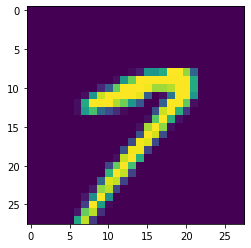

In [828]:
doc = 71
show_mnist_image(X_train[doc]),y_train[doc]

In [753]:
X_test[19]

9

(None, 3)

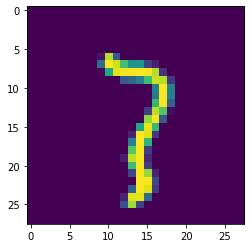

In [823]:
rand_doc = 20
show_mnist_image(X_test[rand_doc]),y_test[rand_doc]

In [345]:
from sklearn.metrics.pairwise import cosine_similarity

In [817]:
query_doc = X_test[0]
candidate_docs = list(lsh_.query(query_doc))

In [818]:
sims = cosine_similarity(X_train,query_doc.reshape(1,-1))
sims

array([[0.44526422],
       [0.49032654],
       [0.43769482],
       ...,
       [0.53968777],
       [0.30927793],
       [0.58916871]])

In [819]:
max_sim_idx = sims.argmax()
max_sim_idx, sims[max_sim_idx]

(385, array([0.85854979]))

In [820]:
doc = X_train[max_sim_idx]

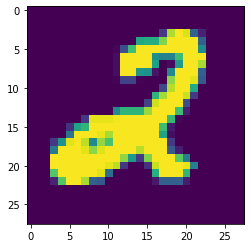

In [821]:
show_mnist_image(doc)

In [232]:
def lsh_prediction(test_doc):
    candidate_docs = list(lsh_.query(test_doc))
    sims = cosine_similarity(mnist_data[[candidate_docs]],test_doc.reshape(1,-1))
    max_sim_idx = sims.argmax()
    prediction = y_train[candidate_docs[max_sim_idx]]
    return prediction

In [330]:
acc = 0
predictions = []
for test_doc,label in zip(X_test[:50],y_test[:50]):
    predictions.append(lsh_prediction(test_doc))
    if label == lsh_prediction(test_doc):
        acc+=1
acc_ = acc/len(y_test)

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensiona

In [333]:
lsh_prediction(X_test[10])

/home/gurmukh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


9

In [331]:
acc_

0.008888888888888889

In [436]:
np.random.randint(low=0, high=255, size=(4, 26))

array([[194, 221, 187, 252, 228,   4, 129,  91,  94, 247, 250,  50, 241,
         22,  86, 159, 136,  29,  95, 228,  70, 158,  82,  25, 201, 202],
       [215, 178,  50, 249,  98,  55, 201,  37, 181,  33,  57, 128,  51,
        139,  51, 203,  86, 100, 147,  58,  25,  23,   9, 183, 232,  13],
       [ 65,  56,  38, 223,   3,  60, 210,  14, 253,  78, 189, 192, 191,
        159,  38, 177,  13, 152,  95,  16,  67, 231, 205, 107, 138, 204],
       [115,  10, 182,  16,  99, 188,  67, 254, 136, 127, 183,  78, 158,
        240,  23, 200, 189, 102, 119, 162, 193, 247,  82,  80,  78,  54]])

In [439]:
np.random.randn(2,784).dot(X_train[0])

array([ 5.93904982, -2.2647955 ])

In [440]:
np.random.randn(2,784).dot(X_train[1])

array([0.87411631, 2.25003779])

In [441]:
np.random.randn(2,784).dot(X_train[2])

array([ -4.06834699, -10.98230783])

In [442]:
np.random.randn(2,784).dot(X_train[3])

array([ 6.82127714, 10.0152426 ])

In [504]:
from sklearn.datasets import make_blobs
from itertools import cycle

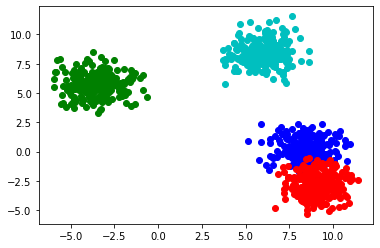

In [540]:
centers = [ (0, 0), (5, 5)]
n_samples = 1000
centers = 4
X, y = make_blobs(n_samples=n_samples, centers=centers,n_features=2)
def plot_blob(X,y,centers):
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(centers), colors):
        plt.plot(X[:,0][y == k],X[:,1][y == k],'{}o'.format(col))

plot_blob(X,y,centers)

In [ ]:
#     Address
#     Avionic Solutions (Rohini, DL) Shop number 223 2nd Floor, kings Mall Rohini , Near Rohini west metro station, Sector-10 Rohini , Delhi 110085

#     Business hours
#     Monday to Saturday 10:00-19:00

#     Break time
#     Sunday

#     Contact
#     8448858077/011-27866708

#     Address
#     Nill-26-Ab, First Floor, Near Shani Mandir, Malviya Nagar, Delhi

#     Business hours
#     Monday to Saturday 10:00-19:00

#     Break time
#     Sunday

#     Contact
#     8130109419/011-40415961
   

In [525]:
# X,y

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train,y_train)
accuracy_score(y_true=y_test, y_pred=sklearn_knn.predict(X_test))

0.9733333333333334

In [546]:
X_train,y_train

(array([[-0.86765138,  5.2642909 ],
        [-4.20812402,  5.6929963 ],
        [ 6.81384074, -0.48492561],
        ...,
        [ 8.10017802,  0.70603708],
        [ 5.60590681,  8.8007195 ],
        [ 8.67924187, -3.51443474]]),
 array([1, 1, 0, 3, 0, 1, 2, 0, 3, 0, 1, 2, 3, 3, 1, 2, 3, 0, 0, 1, 2, 0,
        2, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 0, 0, 3, 3, 0, 0, 1, 0, 1, 0, 0,
        2, 0, 2, 3, 1, 1, 0, 2, 3, 1, 0, 3, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0,
        3, 0, 0, 3, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1, 2, 0, 3, 3, 1, 1, 3, 3,
        0, 0, 3, 2, 0, 3, 0, 2, 0, 1, 3, 0, 0, 2, 2, 2, 0, 3, 2, 1, 1, 2,
        2, 0, 3, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 2, 3, 0, 3, 1, 1, 2, 0, 2,
        3, 0, 3, 1, 1, 2, 1, 0, 1, 0, 3, 2, 0, 1, 3, 0, 3, 3, 3, 3, 1, 2,
        0, 0, 1, 2, 0, 1, 2, 1, 1, 3, 3, 2, 0, 3, 3, 2, 1, 0, 1, 1, 2, 0,
        2, 2, 0, 3, 1, 2, 2, 2, 2, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 1, 2, 0,
        0, 0, 3, 1, 2, 2, 3, 1, 3, 0, 3, 0, 0, 0, 1, 3, 0, 2, 1, 1, 3, 0,
        0, 0, 2, 0, 1, 1, 3, 

In [580]:
def select_random_vectors(X,numvectors):
    rand_vecs = []
    for i in range(numvectors):
        rand_indices = np.random.choice(a=range(X.shape[0]),size=X.shape[1])
        rand_vec = np.mean(X[rand_indices],axis=0)
        rand_vecs.append(rand_vec)
    return rand_vecs

In [581]:
np.mean(X[np.random.choice(a=range(X.shape[0]),size=X.shape[1])],axis=0)

array([ 9.22527681, -3.7456778 ])

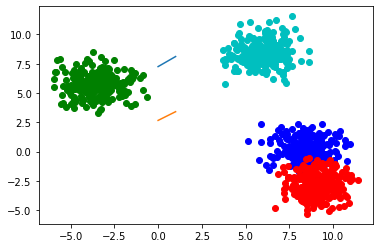

In [583]:
rand_vecs = select_random_vectors(X,2)
plot_blob(X,y,centers)
plt.plot(rand_vecs)

In [584]:
rand_vecs

[array([7.25668405, 2.65971159]), array([8.11545741, 3.40453201])]

In [591]:
np.sum(np.random.rand(5,10),axis=1).shape

(5,)

In [599]:
np.power(1,np.ones((5,5))*2)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [606]:
a = np.ones((5,5))*5
a = a**2

In [619]:
np.sqrt(a)
b= [1,3,2,3,4,5,6,7,0]
c= [12,34,11,23,42,12,34,55,2]

In [620]:
[x for _, x in sorted(zip(b,c), key=lambda pair: pair[0])]

[2, 12, 11, 34, 23, 42, 12, 34, 55]

In [25]:
def make_hash_key(inp):
    return ''.join(inp)

In [21]:
import tensorflow as tf

In [43]:
data = tf.placeholder("float", [None, 784])
rand_hash_vec = tf.placeholder("float", [None, 784])
distance_matrix = tf.matmul(data,tf.transpose(rand_hash_vec))
euclidean_dist = tf.sqrt(tf.reduce_sum(distance_matrix ** 2, axis=1))
# keys = list(map(make_hash_key, (distance_matrix > 0).astype('int').astype('str')))

In [53]:
with tf.Session() as sess:
    _,eucl_dist = sess.run([distance_matrix,euclidean_dist], feed_dict={data: X_train, rand_hash_vec: np.random.randn(8,784)})
    print(euc_dist.shape)

(2700,)


In [54]:
(euc_dist>0).astype('int')

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
eucl_dist

array([18.979568, 23.761368, 17.097902, ..., 19.860703, 20.051308,
       11.94329 ], dtype=float32)